In [1]:
import os
# numerical computing package
import numpy as np
# 
from scipy import stats
# command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt
# matplotlib
import matplotlib
# find nearest value
def find_nearest_index(array, value):
    return (np.abs(array - value)).argmin()
#
import sys
#
import pickle
#
import xarray as xr
#
from glob import glob as gb
#
import time
#
import cartopy.crs as ccrs
# basemap toolkit to plot maps
from mpl_toolkits.basemap import Basemap

In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
!pwd

/home/561/erd561/wombat_jra-iaf_mom025


In [4]:
figures_path = '/home/561/erd561/figures/wombat_jra_mom025/'
script_name = nb_name[:-6]
print('Figures will be saved in: ' + figures_path + script_name + '\n')

remote_path1 = '/g/data/ua8/JRA55-do/v1-3/'

remote_path2 = '/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/'

Figures will be saved in: /home/561/erd561/figures/wombat_jra_mom025/c02_mom025-JRA_diagnostics



In [5]:
%%time

from dask.distributed import Client
c = Client()
print(c)

<Client: scheduler='tcp://127.0.0.1:35835' processes=8 cores=8>
CPU times: user 992 ms, sys: 213 ms, total: 1.2 s
Wall time: 5.5 s


In [9]:
# ice_daily, ice_month, ocean_bgc_2d, ocean_bgc_carbon, ocean_bgc_daily,
# ocean_bgc_npzd, ocean_cfc, ocean_force, ocean_global, ocean_month, ocean_surface
years = np.arange(1958, 2017)
print(years)
var1 = 'surface'
files1 = sorted(gb(remote_path2 + 'ocean_' + var1 + '*01.nc'))
for f in files1:
    print(f)
print(len(files1))

var2 = 'force'
files2 = sorted(gb(remote_path2 + 'ocean_' + var2 + '*01.nc'))
for f in files2:
    print(f)
print(len(files2))

[1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971
 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016]
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_surface_1958_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_surface_1959_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_surface_1960_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_surface_1961_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_surface_1962_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_surface_1963_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_surface_1964_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_surface_1965_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_surface_1966_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_surface_1967_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_sur

In [10]:
%%time

sst = []
taux = []
for f1, f2 in zip(files1, files2):
    
    if f1 == files1[0]:
        xt_ocean = \
            xr.open_dataset(f1).\
            xt_ocean.\
            sel(xt_ocean=slice(100-360,170-360))
        yt_ocean = \
            xr.open_dataset(f1).\
            yt_ocean.\
            sel(yt_ocean=slice(-70,-10))
        sst = \
            xr.open_dataset(f1).\
            temp.\
            sel(yt_ocean=slice(-70,-10), xt_ocean=slice(100-360,170-360)).\
            mean(dim='Time')
        print(str(f1) + ' OK')
        
        xu_ocean = \
            xr.open_dataset(f1).\
            xu_ocean.\
            sel(xu_ocean=slice(100-360,170-360))
        yu_ocean = \
            xr.open_dataset(f1).\
            yu_ocean.\
            sel(yu_ocean=slice(-70,-10))
        taux = \
            xr.open_dataset(f2).\
            tau_x.\
            sel(yu_ocean=slice(-70,-10), xu_ocean=slice(100-360,170-360)).\
            mean(dim='Time')
        print(str(f2) + ' OK')
            
    else:
        sst = \
            xr.concat([
                sst,
                xr.open_dataset(f1).\
                temp.\
                sel(yt_ocean=slice(-70,-10), xt_ocean=slice(100-360,170-360)).\
                mean(dim='Time')
            ], 'year'
            )
        print(str(f1) + ' OK')
        
        taux = \
            xr.concat([ 
                taux,
                xr.open_dataset(f2).\
                tau_x.\
                sel(yu_ocean=slice(-70,-10), xu_ocean=slice(100-360,170-360)).\
                mean(dim='Time')
            ], 'year'
            )
        print(str(f2) + ' OK')
    
sst = sst.assign_coords(year=years)
taux = taux.assign_coords(year=years)
    
print(sst.shape)
print(taux.shape)

/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_surface_1958_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_force_1958_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_surface_1959_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_force_1959_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_surface_1960_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_force_1960_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_surface_1961_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_force_1961_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_surface_1962_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_force_1962_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_surface_1963_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_force_1963_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_surface_1964_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_force_1964_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_surface_1965_01.

In [11]:
print(sst)

<xarray.DataArray 'temp' (year: 59, yt_ocean: 353, xt_ocean: 280)>
array([[[      nan,       nan, ..., -1.67315 , -1.668394],
        [      nan,       nan, ..., -1.661679, -1.654559],
        ...,
        [29.232727, 29.24116 , ..., 29.548082, 29.553888],
        [29.291546, 29.297453, ..., 29.587372, 29.593447]],

       [[      nan,       nan, ..., -1.291779, -1.271524],
        [      nan,       nan, ..., -1.241888, -1.216003],
        ...,
        [29.304134, 29.30696 , ..., 29.628859, 29.620335],
        [29.354445, 29.357136, ..., 29.675104, 29.665064]],

       ...,

       [[      nan,       nan, ..., -0.633218, -0.599579],
        [      nan,       nan, ..., -0.499917, -0.467533],
        ...,
        [29.620531, 29.636349, ..., 30.467293, 30.466791],
        [29.587141, 29.607227, ..., 30.510721, 30.505949]],

       [[      nan,       nan, ..., -1.404516, -1.398265],
        [      nan,       nan, ..., -1.393948, -1.385634],
        ...,
        [29.631262, 29.650724, ..., 

In [12]:
%%time

lon_GAB = [116, 146.5]
lat_GAB = [-42.5, -30]
    
sst_GAB_anom = \
    sst.\
    sel(yt_ocean=slice(lat_GAB[0],lat_GAB[1]), 
        xt_ocean=slice(lon_GAB[0]-360,lon_GAB[1]-360)).\
    mean(dim=('yt_ocean', 'xt_ocean')) - \
    sst.\
    sel(yt_ocean=slice(lat_GAB[0],lat_GAB[1]), 
        xt_ocean=slice(lon_GAB[0]-360,lon_GAB[1]-360)).\
    mean(dim=('yt_ocean', 'xt_ocean', 'year'))
print(str(f1) + ' OK')

taux_GAB_anom = \
    taux.\
    sel(yu_ocean=slice(lat_GAB[0],lat_GAB[1]), 
        xu_ocean=slice(lon_GAB[0]-360,lon_GAB[1]-360)).\
    mean(dim=('yu_ocean', 'xu_ocean')) - \
    taux.\
    sel(yu_ocean=slice(lat_GAB[0],lat_GAB[1]), 
        xu_ocean=slice(lon_GAB[0]-360,lon_GAB[1]-360)).\
    mean(dim=('yu_ocean', 'xu_ocean', 'year'))
print(str(f2) + ' OK')
            
print(sst_GAB_anom.shape)
print(sst_GAB_anom)
print(taux_GAB_anom.shape)
print(taux_GAB_anom)


lon_TS = [146.5, 155]
lat_TS = [-45, -35]
sst_TS_anom = \
    sst.\
    sel(yt_ocean=slice(lat_TS[0],lat_TS[1]), 
        xt_ocean=slice(lon_TS[0]-360,lon_TS[1]-360)).\
    mean(dim=('yt_ocean', 'xt_ocean')) - \
    sst.\
    sel(yt_ocean=slice(lat_TS[0],lat_TS[1]), 
        xt_ocean=slice(lon_TS[0]-360,lon_TS[1]-360)).\
    mean(dim=('yt_ocean', 'xt_ocean', 'year'))
print(str(f1) + ' OK')
taux_TS_anom = \
    taux.\
    sel(yu_ocean=slice(lat_TS[0],lat_TS[1]), 
        xu_ocean=slice(lon_TS[0]-360,lon_TS[1]-360)).\
    mean(dim=('yu_ocean', 'xu_ocean')) - \
    taux.\
    sel(yu_ocean=slice(lat_TS[0],lat_TS[1]), 
        xu_ocean=slice(lon_TS[0]-360,lon_TS[1]-360)).\
    mean(dim=('yu_ocean', 'xu_ocean', 'year'))
print(str(f2) + ' OK')       
print(sst_TS_anom.shape)
print(sst_TS_anom)
print(taux_TS_anom.shape)
print(taux_TS_anom)


lon_LC = [110, 116]
lat_LC = [-35, -20]
sst_LC_anom = \
    sst.\
    sel(yt_ocean=slice(lat_LC[0],lat_LC[1]), 
        xt_ocean=slice(lon_LC[0]-360,lon_LC[1]-360)).\
    mean(dim=('yt_ocean', 'xt_ocean')) - \
    sst.\
    sel(yt_ocean=slice(lat_LC[0],lat_LC[1]), 
        xt_ocean=slice(lon_LC[0]-360,lon_LC[1]-360)).\
    mean(dim=('yt_ocean', 'xt_ocean', 'year'))
print(str(f1) + ' OK')
taux_LC_anom = \
    taux.\
    sel(yu_ocean=slice(lat_LC[0],lat_LC[1]), 
        xu_ocean=slice(lon_LC[0]-360,lon_LC[1]-360)).\
    mean(dim=('yu_ocean', 'xu_ocean')) - \
    taux.\
    sel(yu_ocean=slice(lat_LC[0],lat_LC[1]), 
        xu_ocean=slice(lon_LC[0]-360,lon_LC[1]-360)).\
    mean(dim=('yu_ocean', 'xu_ocean', 'year'))
print(str(f2) + ' OK')       
print(sst_LC_anom.shape)
print(sst_LC_anom)
print(taux_LC_anom.shape)
print(taux_LC_anom)

/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_surface_2016_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr0/ocean_force_2016_01.nc OK
(59,)
<xarray.DataArray 'temp' (year: 59)>
array([-3.243561e-01,  2.668657e-01, -3.869972e-01,  5.286512e-01,
        3.507185e-01,  4.036798e-01, -1.275444e-02, -9.953499e-03,
        9.577274e-02,  1.603441e-01, -3.718405e-01, -2.280779e-01,
       -3.307714e-01, -9.505272e-02,  2.096224e-01,  5.305099e-02,
        3.196058e-01,  9.737015e-02,  3.392935e-01,  2.289677e-02,
        1.469278e-01, -6.300449e-02, -2.511263e-01, -3.537941e-01,
       -3.528833e-01, -1.091099e-02,  1.245698e+00,  1.373460e+00,
        9.030275e-01, -6.560888e-01, -5.072880e-02, -3.262615e-02,
       -4.137611e-02, -3.485394e-02,  1.341820e-01, -1.281490e-01,
       -3.385496e-01, -2.565794e-01, -4.352160e-01, -1.044664e-01,
       -2.317963e-01,  1.555443e-03,  6.340504e-02, -9.130669e-02,
       -5.097399e-01, -2.813387e-01, -4.385357e-01, -3.329916e-01,
       -4.489918e-0

1958 OK
1959 OK
1960 OK
1961 OK
1962 OK
1963 OK
1964 OK
1965 OK
1966 OK
1967 OK
1968 OK
1969 OK
1970 OK
1971 OK
1972 OK
1973 OK
1974 OK
1975 OK
1976 OK
1977 OK
1978 OK
1979 OK
1980 OK
1981 OK
1982 OK
1983 OK
1984 OK
1985 OK
1986 OK
1987 OK
1988 OK
1989 OK
1990 OK
1991 OK
1992 OK
1993 OK
1994 OK
1995 OK
1996 OK
1997 OK
1998 OK
1999 OK
2000 OK
2001 OK
2002 OK
2003 OK
2004 OK
2005 OK
2006 OK
2007 OK
2008 OK
2009 OK
2010 OK
2011 OK
2012 OK
2013 OK
2014 OK
2015 OK
2016 OK
CPU times: user 6min 53s, sys: 3min 35s, total: 10min 29s
Wall time: 6min 19s


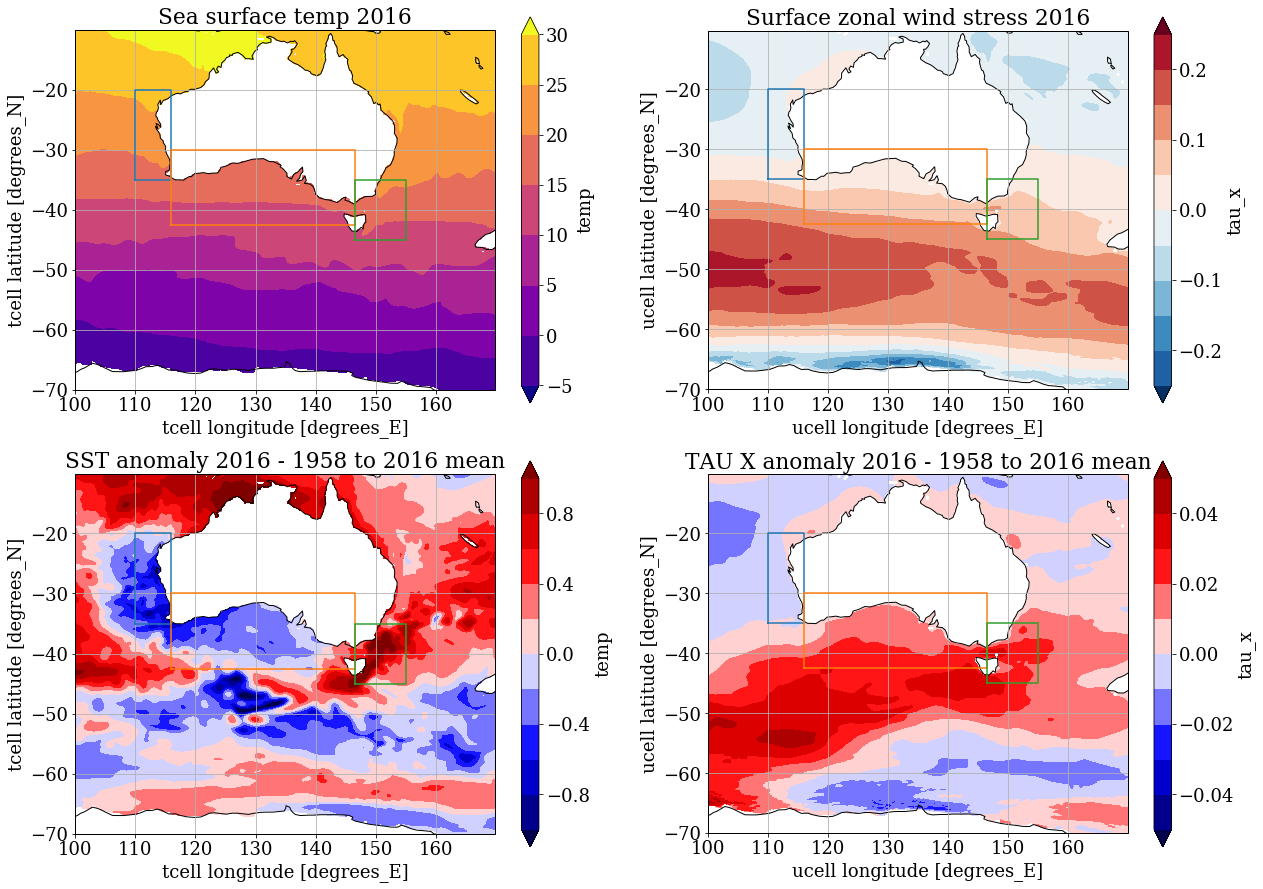

In [40]:
%%time

matplotlib.rcParams.update({'font.size': 18}) 
row = 2
col = 2
plt.rc('text', usetex=False)
plt.rc('font', family='serif')


for fid, (f1, f2) in enumerate(zip(files1, files2)):
    plt.close('all')
    fig = plt.figure() 
    fig.set_size_inches(18,14)

    ##
    ax = plt.subplot(row,col,1, projection=ccrs.PlateCarree())
    ax.coastlines()
    cmap = 'plasma'
    step = 5
    contf_lvls = np.arange(-5,30+1e-08,step) 
    sst[fid].plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
    plt.title('Sea surface temp ' + str(years[fid]))
    ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
    ax.grid()
    plt.plot(
        [lon_LC[0], lon_LC[1], lon_LC[1], lon_LC[0], lon_LC[0]],
        [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
    plt.plot(
        [lon_GAB[0], lon_GAB[1], lon_GAB[1], lon_GAB[0], lon_GAB[0]],
        [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
    plt.plot(
        [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
        [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])
    
    ax = plt.subplot(row,col,2, projection=ccrs.PlateCarree())
    ax.coastlines()
    cmap = 'RdBu_r'
    step = 0.05
    contf_lvls = np.arange(-0.25,0.25+1e-08,step)
    taux[fid].plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
    plt.title('Surface zonal wind stress ' + str(years[fid]))
    ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
    ax.grid()
    plt.plot(
        [lon_LC[0], lon_LC[1], lon_LC[1], lon_LC[0], lon_LC[0]],
        [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
    plt.plot(
        [lon_GAB[0], lon_GAB[1], lon_GAB[1], lon_GAB[0], lon_GAB[0]],
        [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
    plt.plot(
        [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
        [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])

    ##
    ax = plt.subplot(row,col,3, projection=ccrs.PlateCarree())
    ax.coastlines()
    cmap = 'seismic'
    step = 0.2
    contf_lvls = np.arange(-1,1+1e-08,step) 
    sst_anom = sst[fid] - sst.mean(dim='year')
    sst_anom.plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
    plt.title('SST anomaly ' + str(years[fid]) + ' - 1958 to 2016 mean')
    ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
    ax.grid()
    plt.plot(
        [lon_LC[0], lon_LC[1], lon_LC[1], lon_LC[0], lon_LC[0]],
        [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
    plt.plot(
        [lon_GAB[0], lon_GAB[1], lon_GAB[1], lon_GAB[0], lon_GAB[0]],
        [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
    plt.plot(
        [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
        [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])

    ax = plt.subplot(row,col,4, projection=ccrs.PlateCarree())
    ax.coastlines()
    cmap = 'seismic'
    step = 0.01
    contf_lvls = np.arange(-0.05,0.05+1e-08,step)
    taux_anom = taux[fid] - taux.mean(dim='year')
    taux_anom.plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
    plt.title('TAU X anomaly ' + str(years[fid]) + ' - 1958 to 2016 mean')
    ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
    ax.grid()
    plt.plot(
        [lon_LC[0], lon_LC[1], lon_LC[1], lon_LC[0], lon_LC[0]],
        [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
    plt.plot(
        [lon_GAB[0], lon_GAB[1], lon_GAB[1], lon_GAB[0], lon_GAB[0]],
        [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
    plt.plot(
        [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
        [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])

    fig.tight_layout(rect=[0, 0, 1, 0.90])

    output_ls = os.listdir(figures_path)
    if not script_name:
        script_name = 'test'
    elif script_name not in output_ls:
        os.mkdir(figures_path + '/' + script_name)
    plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
                + '_fig5_' + str(years[fid]) + '.png', bbox_inches='tight', dpi=200)
    
    print(str(years[fid]) + ' OK')


CPU times: user 5.28 s, sys: 2.55 s, total: 7.83 s
Wall time: 4.72 s


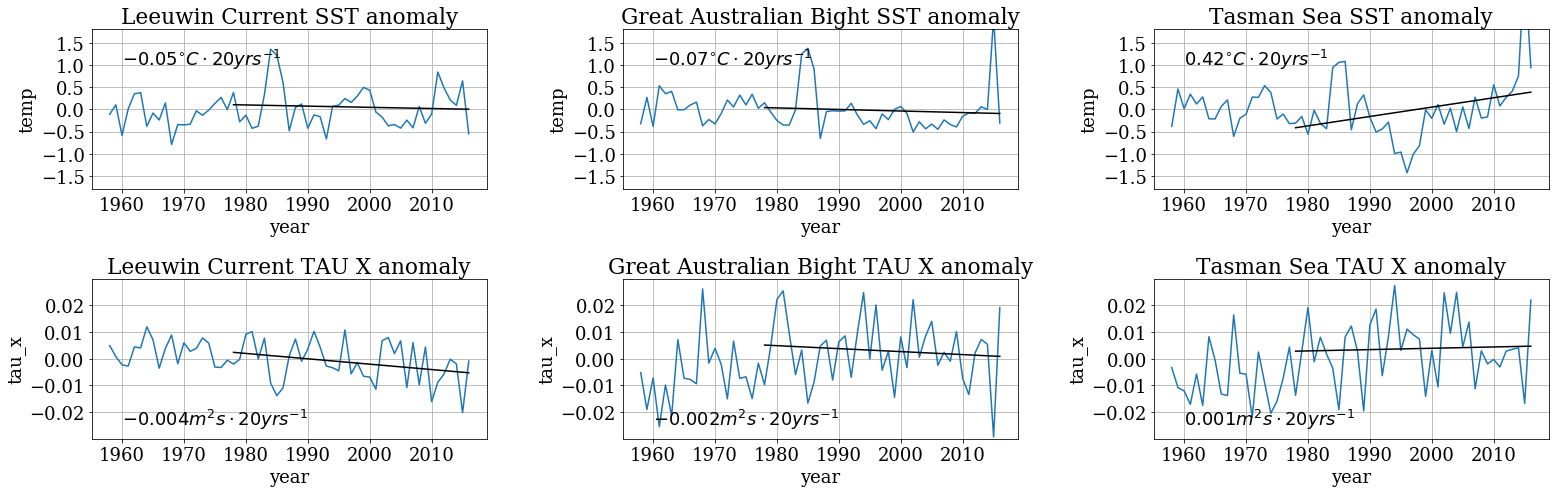

In [26]:
%%time

matplotlib.rcParams.update({'font.size': 18}) 
row = 2
col = 3
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(22,8)


##
ax = plt.subplot(row,col,1)
sst_LC_anom.plot()
plt.title('Leeuwin Current SST anomaly')
plt.ylim([-1.8, 1.8])
plt.yticks(np.arange(-1.5,2,0.5))
# plt.xticks(np.arange(2,70,10), np.arange(1960,2020,10))
ax.grid()
slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], sst_LC_anom[20:])
plt.plot([1978, 2016], [1978*slope+intercept, 2016*slope+intercept], color='black')
plt.text(1960, 1, '$' + str(np.round(slope*20,2)) + '^{\circ}C \cdot 20 yrs^{-1}$')

ax = plt.subplot(row,col,4)
taux_LC_anom.plot()
plt.title('Leeuwin Current TAU X anomaly')
plt.ylim([-0.03, 0.03])
plt.yticks(np.arange(-0.02,0.03,0.01))
# plt.xticks(np.arange(2,70,10), np.arange(1960,2020,10))
ax.grid()
slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], taux_LC_anom[20:])
plt.plot([1978, 2016], [1978*slope+intercept, 2016*slope+intercept], color='black')
plt.text(1960, -0.025, '$' + str(np.round(slope*20,3)) + 'm^{2} s \cdot 20 yrs^{-1}$')

##
ax = plt.subplot(row,col,2)
sst_GAB_anom.plot()
plt.title('Great Australian Bight SST anomaly')
plt.ylim([-1.8, 1.8])
plt.yticks(np.arange(-1.5,2,0.5))
# plt.xticks(np.arange(2,70,10), np.arange(1960,2020,10))
ax.grid()
slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], sst_GAB_anom[20:])
plt.plot([1978, 2016], [1978*slope+intercept, 2016*slope+intercept], color='black')
plt.text(1960, 1, '$' + str(np.round(slope*20,2)) + '^{\circ}C \cdot 20 yrs^{-1}$')


ax = plt.subplot(row,col,5)
taux_GAB_anom.plot()
plt.title('Great Australian Bight TAU X anomaly')
plt.ylim([-0.03, 0.03])
plt.yticks(np.arange(-0.02,0.03,0.01))
# plt.xticks(np.arange(2,70,10), np.arange(1960,2020,10))
ax.grid()
slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], taux_GAB_anom[20:])
plt.plot([1978, 2016], [1978*slope+intercept, 2016*slope+intercept], color='black')
plt.text(1960, -0.025, '$' + str(np.round(slope*20,3)) + 'm^{2} s \cdot 20 yrs^{-1}$')


##
ax = plt.subplot(row,col,3)
sst_TS_anom.plot()
plt.title('Tasman Sea SST anomaly')
plt.ylim([-1.8, 1.8])
plt.yticks(np.arange(-1.5,2,0.5))
# plt.xticks(np.arange(2,70,10), np.arange(1960,2020,10))
ax.grid()
slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], sst_TS_anom[20:])
plt.plot([1978, 2016], [1978*slope+intercept, 2016*slope+intercept], color='black')
plt.text(1960, 1, '$' + str(np.round(slope*20,2)) + '^{\circ}C \cdot 20 yrs^{-1}$')


ax = plt.subplot(row,col,6)
taux_TS_anom.plot()
plt.title('Tasman Sea TAU X anomaly')
plt.ylim([-0.03, 0.03])
plt.yticks(np.arange(-0.02,0.03,0.01))
# plt.xticks(np.arange(2,70,10), np.arange(1960,2020,10))
ax.grid()
slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], taux_TS_anom[20:])
plt.plot([1978, 2016], [1978*slope+intercept, 2016*slope+intercept], color='black')
plt.text(1960, -0.025, '$' + str(np.round(slope*20,3)) + 'm^{2} s \cdot 20 yrs^{-1}$')


fig.tight_layout(rect=[0, 0, 1, 0.90])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig6_.png', bbox_inches='tight', dpi=200)



In [23]:
%%time

sst_slopes = xr.DataArray(np.zeros([len(yt_ocean), len(xt_ocean)]), \
                              dims=('latitude', 'longitude'), coords=[yt_ocean, xt_ocean], name='sst')
taux_slopes = xr.DataArray(np.zeros([len(yu_ocean), len(xu_ocean)]), \
                              dims=('latitude', 'longitude'), coords=[yu_ocean, xu_ocean], name='taux')
for iid, i in enumerate(yt_ocean):
    for jid, j in enumerate(xt_ocean):
        sst_slopes[iid, jid], _, _, _, _ = \
        stats.linregress(years[20:], sst[20:, iid, jid])
    print('lat ' + str(np.array(i)))
    
    
for iid, i in enumerate(yu_ocean):
    for jid, j in enumerate(xu_ocean):        
        taux_slopes[iid, jid], _, _, _, _ = \
        stats.linregress(years[20:], taux[20:, iid, jid])
    print('lat ' + str(np.array(i)))



lat -69.98914896732052
lat -69.8835503781156
lat -69.77795178891068
lat -69.67235319970577
lat -69.56675461050085
lat -69.46115602129593
lat -69.35555743209102
lat -69.2499588428861
lat -69.14436025368119
lat -69.03876166447627
lat -68.93316307527135
lat -68.82756448606644
lat -68.72196589686152
lat -68.6163673076566
lat -68.51076871845169
lat -68.40517012924677
lat -68.29957154004185
lat -68.19397295083694
lat -68.08837436163202
lat -67.9827757724271
lat -67.87717718322219
lat -67.77157859401727
lat -67.66598000481235
lat -67.56038141560744
lat -67.45478282640252
lat -67.3491842371976
lat -67.24358564799269
lat -67.13798705878777
lat -67.03238846958286
lat -66.92678988037794
lat -66.82119129117302
lat -66.7155927019681
lat -66.60999411276319
lat -66.50439552355827
lat -66.39879693435336
lat -66.29319834514844
lat -66.18759975594352
lat -66.0820011667386
lat -65.97640257753369
lat -65.87080398832877
lat -65.76520539912386
lat -65.65960680991894
lat -65.55400822071402
lat -65.4484096315

lat -69.93634967271807
lat -69.83075108351315
lat -69.72515249430823
lat -69.61955390510332
lat -69.5139553158984
lat -69.40835672669348
lat -69.30275813748857
lat -69.19715954828365
lat -69.09156095907873
lat -68.98596236987382
lat -68.8803637806689
lat -68.77476519146398
lat -68.66916660225907
lat -68.56356801305415
lat -68.45796942384924
lat -68.35237083464432
lat -68.2467722454394
lat -68.14117365623449
lat -68.03557506702957
lat -67.92997647782465
lat -67.82437788861974
lat -67.71877929941482
lat -67.6131807102099
lat -67.50758212100499
lat -67.40198353180007
lat -67.29638494259515
lat -67.19078635339024
lat -67.08518776418532
lat -66.9795891749804
lat -66.87399058577549
lat -66.76839199657057
lat -66.66279340736565
lat -66.55719481816074
lat -66.45159622895582
lat -66.3459976397509
lat -66.24039905054599
lat -66.13480046134107
lat -66.02920187213616
lat -65.92360328293124
lat -65.81800469372632
lat -65.7124061045214
lat -65.60680751531649
lat -65.50120892611157
lat -65.3956103369

CPU times: user 3.64 s, sys: 1.65 s, total: 5.29 s
Wall time: 3.26 s


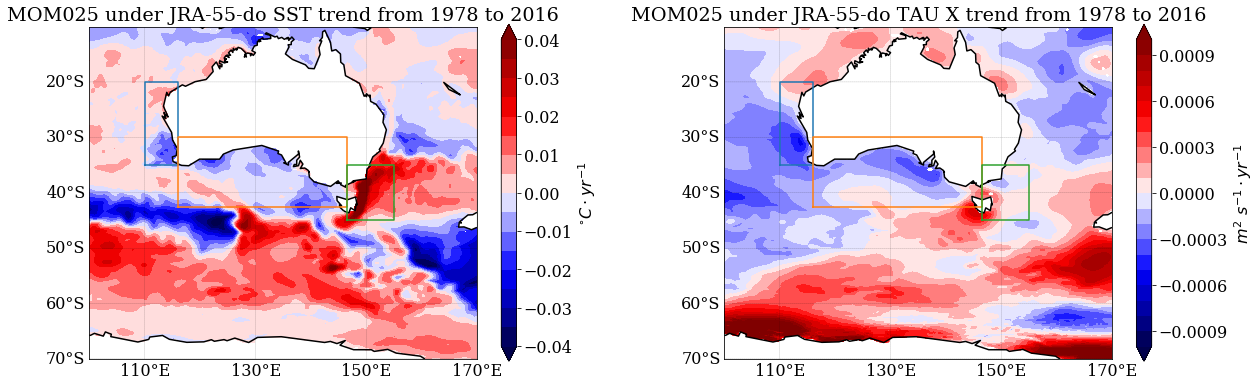

In [28]:
%%time

matplotlib.rcParams.update({'font.size': 16}) 
row = 1
col = 2
plt.rc('text', usetex=False)
plt.rc('font', family='serif')


plt.close('all')
fig = plt.figure() 
fig.set_size_inches(18,6)

# xx,yy = Bm(105, -15)
# value = Bm.is_land(xx,yy)
# print(value)


##
Bm = Basemap(projection='cyl', llcrnrlat=-70,urcrnrlat=-10,\
llcrnrlon=100,urcrnrlon=170, resolution='c')

#
Bm_lon_LC, Bm_lat_LC = Bm(lon_LC, lat_LC)
Bm_lon_GAB, Bm_lat_GAB = Bm(lon_GAB, lat_GAB)
Bm_lon_TS, Bm_lat_TS = Bm(lon_TS, lat_TS)


 # meshgrid of lon lats
lons, lats = np.meshgrid(xt_ocean+360, yt_ocean)
# use projection template to create x and y axis
Bm_lons, Bm_lats = Bm(lons, lats)
##
ax = plt.subplot(row,col,1)
cmap = 'seismic'
step = 0.005
contf_lvls = np.arange(-0.04,0.04+1e-08,step) 
# draw land outlines
Bm.drawcoastlines(linewidth=1.5)
contf = Bm.contourf(Bm_lons, Bm_lats, sst_slopes, 
                   contf_lvls, cmap=cmap, extend='both')
# meridians. last input is meridians tick label
Bm.drawmeridians(np.arange(110, 180, 20), linewidth=0.2, labels=[0,0,0,1])
# parallels. last input is paralles tick label
Bm.drawparallels(np.arange(-70, -10, 10), linewidth=0.2, labels=[1,0,0,0])
plt.title('MOM025 under JRA-55-do SST trend from 1978 to 2016')
cbar = plt.colorbar()
cbar.set_label('$^{\circ}C \cdot yr^{-1}$')
Bm.plot(
    [Bm_lon_LC[0], Bm_lon_LC[1], Bm_lon_LC[1], Bm_lon_LC[0], Bm_lon_LC[0]],
    [Bm_lat_LC[0], Bm_lat_LC[0], Bm_lat_LC[1], Bm_lat_LC[1], Bm_lat_LC[0]])
Bm.plot(
    [Bm_lon_GAB[0], Bm_lon_GAB[1], Bm_lon_GAB[1], Bm_lon_GAB[0], Bm_lon_GAB[0]],
    [Bm_lat_GAB[0], Bm_lat_GAB[0], Bm_lat_GAB[1], Bm_lat_GAB[1], Bm_lat_GAB[0]])
Bm.plot(
    [Bm_lon_TS[0], Bm_lon_TS[1], Bm_lon_TS[1], Bm_lon_TS[0], Bm_lon_TS[0]],
    [Bm_lat_TS[0], Bm_lat_TS[0], Bm_lat_TS[1], Bm_lat_TS[1], Bm_lat_TS[0]])


##
Bm = Basemap(projection='cyl', llcrnrlat=-70,urcrnrlat=-10,\
llcrnrlon=100,urcrnrlon=170, resolution='c')
 # meshgrid of lon lats
lons, lats = np.meshgrid(xu_ocean+360, yu_ocean)
# use projection template to create x and y axis
Bm_lons, Bm_lats = Bm(lons, lats)
##
ax = plt.subplot(row,col,2)
cmap = 'seismic'
step = 0.0001
contf_lvls = np.arange(-0.0010,0.0010+1e-08,step) 
# draw land outlines
Bm.drawcoastlines(linewidth=1.5)
contf = Bm.contourf(Bm_lons, Bm_lats, taux_slopes, 
                   contf_lvls, cmap=cmap, extend='both')
# meridians. last input is meridians tick label
Bm.drawmeridians(np.arange(110, 180, 20), linewidth=0.2, labels=[0,0,0,1])
# parallels. last input is paralles tick label
Bm.drawparallels(np.arange(-70, -10, 10), linewidth=0.2, labels=[1,0,0,0])
plt.title('MOM025 under JRA-55-do TAU X trend from 1978 to 2016')
cbar = plt.colorbar()
cbar.set_label('$m^{2}\ s^{-1} \cdot yr^{-1}$')
Bm.plot(
    [Bm_lon_LC[0], Bm_lon_LC[1], Bm_lon_LC[1], Bm_lon_LC[0], Bm_lon_LC[0]],
    [Bm_lat_LC[0], Bm_lat_LC[0], Bm_lat_LC[1], Bm_lat_LC[1], Bm_lat_LC[0]])
Bm.plot(
    [Bm_lon_GAB[0], Bm_lon_GAB[1], Bm_lon_GAB[1], Bm_lon_GAB[0], Bm_lon_GAB[0]],
    [Bm_lat_GAB[0], Bm_lat_GAB[0], Bm_lat_GAB[1], Bm_lat_GAB[1], Bm_lat_GAB[0]])
Bm.plot(
    [Bm_lon_TS[0], Bm_lon_TS[1], Bm_lon_TS[1], Bm_lon_TS[0], Bm_lon_TS[0]],
    [Bm_lat_TS[0], Bm_lat_TS[0], Bm_lat_TS[1], Bm_lat_TS[1], Bm_lat_TS[0]])

# ax = plt.subplot(row,col,2, projection=ccrs.PlateCarree())
# ax.coastlines()
# cmap = 'seismic'
# step = 0.005
# contf_lvls = np.arange(-0.04,0.04+1e-08,step)
# uas_10m_slopes.plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
# # plt.title('Surface zonal wind speed ' + str(years[fid]))
# ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
# ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
# ax.grid()

fig.tight_layout(rect=[0, 0, 1, 0.90])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig7_.png', bbox_inches='tight', dpi=200)


